# Where to take my talents to - a world happiness analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx

In [2]:
y2015 = pd.read_csv("Data/2015.csv")
y2016 = pd.read_csv("Data/2016.csv")
y2017 = pd.read_csv("Data/2017.csv")
y2018 = pd.read_csv("Data/2018.csv")
y2019 = pd.read_csv("Data/2019.csv")
y2020 = pd.read_csv("Data/2020.csv")

## Preprocessing 

For each year's dataframe, we will preprocess the data by determinig if there are any invalid entries. Specifically, any values of NaN or 0 (when not appropriate), will be treated by taking the mean of the remaining values in the column. We then concatenate all the dataframes to form a final version which includes all the years.

In [3]:
# COLUMNS IMPORTANTS 
cols=['Year','Country','Happiness_Score','Happiness_Rank', 'GDP_per_capita', 'Healthy_life_expectancy','Freedom', 'Generosity','Perceptions_of_corruption']

In [4]:
y2015.rename(columns={'Economy (GDP per Capita)':'GDP_per_capita', \
                      'Happiness Score':'Happiness_Score',\
                      'Happiness Rank':'Happiness_Rank',\
                       'Health (Life Expectancy)':'Healthy_life_expectancy',\
                     'Trust (Government Corruption)':'Perceptions_of_corruption'}, inplace=True)
y2015['Year']=2015
y2015=y2015.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2015== 0).sum())
print('Number of null:', y2015.isnull().sum().sum())

y2015.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    1
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2015,Switzerland,7.587,1,1.39651,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,7.561,2,1.30232,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,7.527,3,1.32548,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,7.522,4,1.45900,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,7.427,5,1.32629,0.90563,0.63297,0.45811,0.32957


In [5]:
y2016.rename(columns={'Economy (GDP per Capita)':'GDP_per_capita', \
                     'Happiness Score':'Happiness_Score',\
                      'Happiness Rank':'Happiness_Rank',\
                       'Health (Life Expectancy)':'Healthy_life_expectancy',\
                     'Trust (Government Corruption)':'Perceptions_of_corruption'}, inplace=True)
y2016['Year']=2016
y2016=y2016.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2016== 0).sum())
print('Number of null:', y2016.isnull().sum().sum())

y2016.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    1
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2016,Denmark,7.526,1,1.44178,0.79504,0.57941,0.36171,0.44453
1,2016,Switzerland,7.509,2,1.52733,0.86303,0.58557,0.28083,0.41203
2,2016,Iceland,7.501,3,1.42666,0.86733,0.56624,0.47678,0.14975
3,2016,Norway,7.498,4,1.57744,0.79579,0.59609,0.37895,0.35776
4,2016,Finland,7.413,5,1.40598,0.81091,0.57104,0.25492,0.41004


In [6]:
y2017.rename(columns={'Economy..GDP.per.Capita.':'GDP_per_capita', \
                       'Health..Life.Expectancy.':'Healthy_life_expectancy',\
                     'Trust..Government.Corruption.':'Perceptions_of_corruption',\
                     'Happiness.Rank': 'Happiness_Rank',\
                     'Happiness.Score': 'Happiness_Score'}, inplace=True)
y2017['Year']=2017
y2017=y2017.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2017== 0).sum())
print('Number of null:', y2017.isnull().sum().sum())

y2017.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    1
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2017,Norway,7.537,1,1.616463,0.796667,0.635423,0.362012,0.315964
1,2017,Denmark,7.522,2,1.482383,0.792566,0.626007,0.355280,0.400770
2,2017,Iceland,7.504,3,1.480633,0.833552,0.627163,0.475540,0.153527
3,2017,Switzerland,7.494,4,1.564980,0.858131,0.620071,0.290549,0.367007
4,2017,Finland,7.469,5,1.443572,0.809158,0.617951,0.245483,0.382612


In [7]:
y2018.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Overall rank': 'Happiness_Rank',\
                      'Country or region':'Country',\
                      'GDP per capita':'GDP_per_capita',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Score': 'Happiness_Score'}, inplace=True)
y2018['Year']=2018
y2018=y2018.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2018== 0).sum())
print('Number of null:', y2018.isnull().sum().sum())
print(y2018.columns[y2018.isna().any()].tolist())

y2018.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    2
dtype: int64
Number of null: 1
['Perceptions_of_corruption']


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2018,Finland,7.632,1,1.305,0.874,0.681,0.202,0.393
1,2018,Norway,7.594,2,1.456,0.861,0.686,0.286,0.340
2,2018,Denmark,7.555,3,1.351,0.868,0.683,0.284,0.408
3,2018,Iceland,7.495,4,1.343,0.914,0.677,0.353,0.138
4,2018,Switzerland,7.487,5,1.420,0.927,0.660,0.256,0.357


In [8]:
y2019.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Overall rank': 'Happiness_Rank',\
                      'Country or region':'Country',\
                      'GDP per capita':'GDP_per_capita',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Score': 'Happiness_Score'}, inplace=True)
y2019['Year']=2019
y2019=y2019.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2019== 0).sum())
print('Number of null:', y2019.isnull().sum().sum())

y2019.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               1
Healthy_life_expectancy      1
Freedom                      1
Generosity                   1
Perceptions_of_corruption    1
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2019,Finland,7.769,1,1.340,0.986,0.596,0.153,0.393
1,2019,Denmark,7.600,2,1.383,0.996,0.592,0.252,0.410
2,2019,Norway,7.554,3,1.488,1.028,0.603,0.271,0.341
3,2019,Iceland,7.494,4,1.380,1.026,0.591,0.354,0.118
4,2019,Netherlands,7.488,5,1.396,0.999,0.557,0.322,0.298


In [9]:
y2020.rename(columns={'Freedom to make life choices':'Freedom',\
                      'Logged GDP per capita':'GDP_per_capita', \
                      'Country name': 'Country',\
                      'Perceptions of corruption':'Perceptions_of_corruption',\
                      'Healthy life expectancy':'Healthy_life_expectancy',\
                      'Ladder score': 'Happiness_Score'}, inplace=True)
y2020['Happiness_Rank'] = y2020['Happiness_Score'].rank(ascending=False)
y2020['Year']=2020
y2020=y2020.loc[:,cols]

# we check for any zeros/null in the dataframe to determine if it makes sense to replace its value with the mean of the column
print((y2020== 0).sum())
print('Number of null:', y2020.isnull().sum().sum())

y2020.head()

Year                         0
Country                      0
Happiness_Score              0
Happiness_Rank               0
GDP_per_capita               0
Healthy_life_expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64
Number of null: 0


,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2020,Finland,7.8087,1.0,10.639267,71.900825,0.949172,-0.059482,0.195445
1,2020,Denmark,7.6456,2.0,10.774001,72.402504,0.951444,0.066202,0.168489
2,2020,Switzerland,7.5599,3.0,10.979933,74.102448,0.921337,0.105911,0.303728
3,2020,Iceland,7.5045,4.0,10.772559,73.000000,0.948892,0.246944,0.711710
4,2020,Norway,7.4880,5.0,11.087804,73.200783,0.955750,0.134533,0.263218


We observe that the values with zero/null can in fact be replaced by the mean of the remaining entries for the corresponding column. The only columns where this wouldn't make sense is for `Country` and `Happiness_Rank`. We note that `y2020` has no invalid entries.

We now mask all zero/null entries with the corresponding column mean.

We also observe a discrepancy in units used between the `y2020` dataframe vs. the rest. Specifically, the `GDP_per_capita` and `Healthy_life_expectancy` are notably different magnitudes in y2020. Additionally, the range of values in certain columns of `y2020` are much greater than the other years. For example, for Finland the corresponding values are:

* `GDP_per_capita`: 10.64 (2020) vs. 1.34 (2019)
* `Healthy_life_expectancy`: 71.90 (2020) vs. 0.99 (2019)

We decide to address this issue by normalizing the data for all columns that *do not* belong to `Country`, `Happiness_Score` and `Happiness_Rank`.

We also note that normalizing the data for each year's dataframe will re-introduce zero values. However, the interpretation is different from having invalid entries.

In [10]:
# replace invalid values with mean

y2015=y2015.mask(y2015==0).fillna(y2015.mean())
y2016=y2016.mask(y2016==0).fillna(y2016.mean())
y2017=y2017.mask(y2017==0).fillna(y2017.mean())
y2018=y2018.mask(y2018==0).fillna(y2018.mean())
y2019=y2019.mask(y2019==0).fillna(y2019.mean())

In [11]:
# only normalize certain data

cols_to_norm = ['GDP_per_capita','Healthy_life_expectancy','Freedom','Generosity','Perceptions_of_corruption']

y2015[cols_to_norm] = y2015[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2016[cols_to_norm] = y2016[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2017[cols_to_norm] = y2017[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2018[cols_to_norm] = y2018[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2019[cols_to_norm] = y2019[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
y2020[cols_to_norm] = y2020[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [12]:
df = pd.concat([y2015, y2016, y2017, y2018, y2019, y2020], axis=0)
df.head()

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2015,Switzerland,7.587,1.0,0.824544,0.914250,0.992982,0.371323,0.759606
1,2015,Iceland,7.561,2.0,0.768315,0.920807,0.930897,0.547066,0.253220
2,2015,Denmark,7.527,3.0,0.782141,0.845922,0.965668,0.427515,0.875664
3,2015,Norway,7.522,4.0,0.861849,0.856735,1.000000,0.434569,0.659996
4,2015,Canada,7.427,5.0,0.782625,0.877625,0.937983,0.574538,0.595481


In [13]:
df.loc[df['Country']=="Switzerland"]

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,2015,Switzerland,7.5870,1.0,0.824544,0.914250,0.992982,0.371323,0.759606
1,2016,Switzerland,7.5090,2.0,0.832015,0.901873,0.961981,0.325945,0.814379
3,2017,Switzerland,7.4940,4.0,0.834542,0.903212,0.940648,0.338665,0.788440
4,2018,Switzerland,7.4870,5.0,0.673745,0.899020,0.909605,0.402098,0.780702
5,2019,Switzerland,7.4800,6.0,0.860072,0.914093,0.904992,0.439926,0.755011
2,2020,Switzerland,7.5599,3.0,0.905054,0.914502,0.907228,0.472182,0.234856


## What affects a country's happiness score?

We evaluate the signifance of each feature for the given dataframe to determine what factors affect a country's happiness score. Additionally, we examine if any features are more correlated than others.

In [15]:
mod = smf.ols(formula='Happiness_Score ~ GDP_per_capita + Healthy_life_expectancy + Freedom + Generosity + Perceptions_of_corruption', data=df)
np.random.seed(2)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness_Score   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     506.5
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.15e-262
Time:                        04:18:54   Log-Likelihood:                -821.36
No. Observations:                 935   AIC:                             1655.
Df Residuals:                     929   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

We observe at the 95% significance level that `Perceptions_of_corruption` is not deemed significant.

In [37]:
# create dataframe of features
features = df.iloc[:, 4:]
features.head()

,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption
0,0.824544,0.914250,0.992982,0.371323,0.759606
1,0.768315,0.920807,0.930897,0.547066,0.253220
2,0.782141,0.845922,0.965668,0.427515,0.875664
3,0.861849,0.856735,1.000000,0.434569,0.659996
4,0.782625,0.877625,0.937983,0.574538,0.595481


Text(0, 0.5, 'Features')

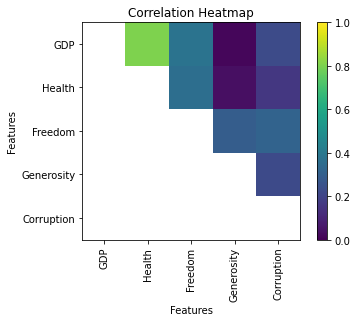

In [53]:
# Create correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

fig, ax = plt.subplots(1,1)

plt.imshow(upper, cmap='viridis', vmax=1, vmin=0)
plt.colorbar()
plt.title('Correlation Heatmap')
feat = ['_','GDP', 'Health', 'Freedom', 'Generosity', 'Corruption']
ax.set_xticklabels(feat, rotation=90)
ax.set_yticklabels(feat)
plt.xlabel('Features')
plt.ylabel('Features')

We notice that from the correlation heatmap that there exists a strong correlation between `GDP_per_capita` and `Healthy_life_expectancy`. This observation is expected as wealthier countries tend to have a better environment and infrastructure that supports healthy living. Some examples of this include better hospital facilities, access to better nutrition, and programs that promote an active lifestyle.

### MATCHING 

First we calculate the median of GPD per capita and then we create a dummy variable, indicating with 1 the countries that have a GPD greater than the median, and with 0 the countries with a GPD lower than the median

In [202]:
y2020_matching = y2020.copy()
median = y2020_matching['GDP_per_capita'].median()
median
y2020_matching['treatment']= np.where(y2020_matching['GDP_per_capita']>median, 1,0)
y2020_matching

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,treatment
0,2020,Finland,7.8087,1.0,10.639267,71.900825,0.949172,-0.059482,0.195445,1
1,2020,Denmark,7.6456,2.0,10.774001,72.402504,0.951444,0.066202,0.168489,1
2,2020,Switzerland,7.5599,3.0,10.979933,74.102448,0.921337,0.105911,0.303728,1
3,2020,Iceland,7.5045,4.0,10.772559,73.000000,0.948892,0.246944,0.711710,1
4,2020,Norway,7.4880,5.0,11.087804,73.200783,0.955750,0.134533,0.263218,1
...,...,...,...,...,...,...,...,...,...,...
148,2020,Central African Republic,3.4759,149.0,6.625160,45.200001,0.640881,0.082410,0.891807,0
149,2020,Rwanda,3.3123,150.0,7.600104,61.098846,0.900589,0.055484,0.183541,0
150,2020,Zimbabwe,3.2992,151.0,7.865712,55.617260,0.711458,-0.072064,0.810237,0
151,2020,South Sudan,2.8166,152.0,7.425360,51.000000,0.451314,0.016519,0.763417,0


For each characteristic of the dataset we will compare the control group with the treatment group

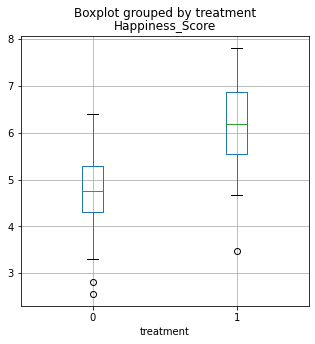

In [203]:
#Happiness Score
y2020_matching.boxplot(by='treatment', column='Happiness_Score', figsize = [5, 5], grid=True)
plt.show()

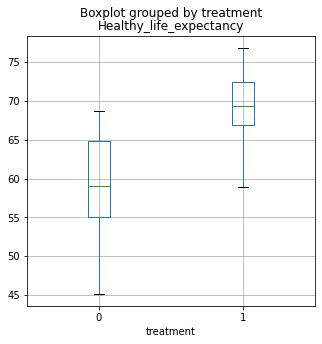

In [204]:
# Healthy life expectancy
y2020_matching.boxplot(by='treatment', column='Healthy_life_expectancy', figsize = [5, 5], grid=True)
plt.show()

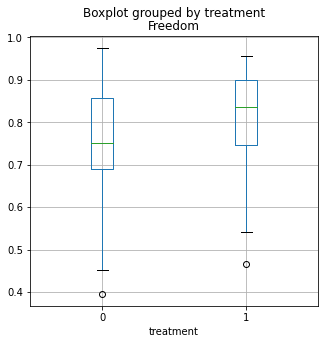

In [205]:
#Freedom
y2020_matching.boxplot(by='treatment', column='Freedom', figsize = [5, 5], grid=True)
plt.show()

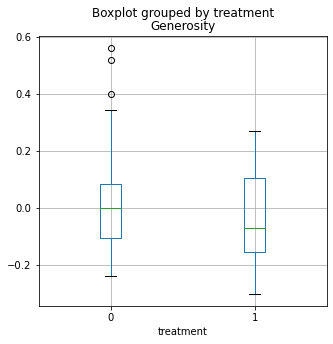

In [206]:
#Generosity
y2020_matching.boxplot(by='treatment', column='Generosity', figsize = [5, 5], grid=True)
plt.show()

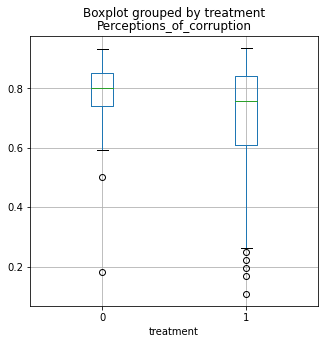

In [207]:
#Perceptions of corruption
y2020_matching.boxplot(by='treatment', column='Perceptions_of_corruption', figsize = [5, 5], grid=True)
plt.show()

### Propensity score model

In [208]:
# let's standardize the continuous features
y2020_matching['Healthy life expectancy'] = (y2020_matching['Healthy_life_expectancy'] - y2020_matching['Healthy_life_expectancy'].mean())/y2020_matching['Healthy_life_expectancy'].std()
y2020_matching['Freedom'] = (y2020_matching['Freedom'] - y2020_matching['Freedom'].mean())/y2020_matching['Freedom'].std()
y2020_matching['Generosity'] = (y2020_matching['Generosity'] - y2020_matching['Generosity'].mean())/y2020_matching['Generosity'].std()
y2020_matching['Perceptions of corruption'] = (y2020_matching['Perceptions_of_corruption'] - y2020_matching['Perceptions_of_corruption'].mean())/y2020_matching['Perceptions_of_corruption'].std()

mod = smf.logit(formula='treatment ~ Healthy_life_expectancy + Freedom + Generosity + Perceptions_of_corruption ', data=y2020_matching)

res = mod.fit()

# # Extract the estimated propensity scores
y2020_matching['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.349780
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                  153
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Dec 2020   Pseudo R-squ.:                  0.4954
Time:                        22:24:45   Log-Likelihood:                -53.516
converged:                       True   LL-Null:                       -106.05
Covariance Type:            nonrobust   LLR p-value:                 8.209e-22
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -25.1238      5.011     -5.013      0.000     -34.

In [209]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [212]:
# Separate the treatment and control groups
treatment_df = y2020_matching[y2020_matching['treatment'] == 1]
control_df = y2020_matching[y2020_matching['treatment'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [213]:
matching

{(0, 62),
 (1, 98),
 (2, 55),
 (4, 127),
 (8, 129),
 (9, 59),
 (10, 116),
 (14, 151),
 (16, 97),
 (17, 140),
 (18, 123),
 (20, 85),
 (21, 141),
 (24, 133),
 (25, 90),
 (27, 126),
 (28, 78),
 (32, 37),
 (33, 12),
 (34, 95),
 (35, 111),
 (36, 134),
 (40, 65),
 (41, 135),
 (42, 150),
 (43, 139),
 (44, 119),
 (45, 22),
 (46, 103),
 (48, 136),
 (53, 87),
 (56, 122),
 (57, 30),
 (66, 71),
 (67, 108),
 (68, 61),
 (69, 31),
 (72, 128),
 (73, 26),
 (75, 142),
 (80, 89),
 (81, 100),
 (82, 60),
 (83, 23),
 (86, 143),
 (88, 64),
 (91, 47),
 (92, 149),
 (93, 70),
 (96, 77),
 (99, 51),
 (101, 109),
 (102, 94),
 (104, 11),
 (105, 49),
 (106, 63),
 (107, 125),
 (110, 7),
 (112, 19),
 (113, 58),
 (114, 5),
 (115, 76),
 (118, 6),
 (120, 79),
 (121, 54),
 (124, 52),
 (130, 3),
 (131, 15),
 (132, 117),
 (137, 74),
 (138, 29),
 (144, 38),
 (145, 50),
 (146, 84),
 (147, 39),
 (152, 13)}

In [216]:
matchingdf = y2020_matching.iloc[[subj_id for t in matching for subj_id in t]]
matchingdf

,Year,Country,Happiness_Score,Happiness_Rank,GDP_per_capita,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,treatment,Healthy life expectancy,Perceptions of corruption,Propensity_score
106,2020,Bangladesh,4.8328,107.0,8.287064,64.503067,0.995573,-0.125793,0.661844,0,0.008152,-0.406894,0.443280
63,2020,Serbia,5.7782,64.0,9.680981,68.210205,-0.482775,-0.389358,0.843509,1,0.533403,0.630172,0.748402
68,2020,Bosnia and Herzegovina,5.6741,69.0,9.455817,67.808136,-1.120737,0.743322,0.933769,0,0.476435,1.145436,0.585981
61,2020,Japan,5.8708,62.0,10.579689,75.000969,0.225843,-1.530492,0.654558,1,1.495561,-0.448485,0.990791
131,2020,Swaziland,4.3081,132.0,9.162674,51.188236,-1.159201,-1.216222,0.708263,0,-1.878376,-0.141900,0.005389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,South Korea,5.8724,61.0,10.510567,73.602730,-1.446646,-0.189948,0.789067,1,1.297449,0.319384,0.968652
138,2020,Sierra Leone,3.9264,139.0,7.268803,50.865143,-0.577700,0.679994,0.861331,0,-1.924154,0.731910,0.001571
29,2020,Italy,6.3874,30.0,10.481836,73.601685,-1.007827,-0.190323,0.873405,1,1.297301,0.800836,0.960859
146,2020,Botswana,3.4789,147.0,9.711204,58.924454,0.322346,-1.553442,0.777931,1,-0.782261,0.255809,0.099811
